# CAPSTONE PROJECT: THE BATTLE OF THE NEIGHBORHOODS [SEATTLE]

### Defined Problem (Introduction): A close friend has planned to open a Japanese/Asian fusion restaurant somewhere in Seattle. To be sucessful, they're searching for a prime location that will service customers who have limited options in their vicinity when it comes to this type of food. What is served will be high quality and and priced appropriately. The target customer will have a discerning taste when it comes to Japanese food and are likely searching for a differentiated offering. Since our close friends uses high quality ingredients and has priced the menu in accordance, the target customer will have no issue paying a premium for dishes on the menu. Additionally, Seattle is a rapidly growing city and enjoys a diverse foodie culture. There are several neighborhoods to choose from that contain growing demand for new, unique and quality food options. Which neighborhood is the best fit for our friend's new restaurant? 

### Data Description: The data collection will involve using the Foursquare API to pull venue infomration for the Seattle area. The assumption made is that openning the restaurant in an area that does not already contain Asian food will draw in customers due to its novelty. API will delivery venuse and location data that can be used to describe a neighbhorhoods unique food offering by exploring the types of restuarant operating in that area. The second assumption is that the restauarant will be more profitable in a moderately high to very high wealth area.  There is a housing price data set for Seattle from the mid-2010s available from Kaggle that will be used to segment areas into degrees of wealth. This dataset includes home price, size of lots and other residential related details.

### Methodology:

### Results:

### Discussion:

### Conclusion:

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [2]:
!wget 'https://transfer.sh/8xDsQ/housesalesprediction.zip'

--2019-07-17 03:20:16--  https://transfer.sh/8xDsQ/housesalesprediction.zip
Resolving transfer.sh (transfer.sh)... 144.76.136.153
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 796588 (778K) [application/x-zip-compressed]
Saving to: ‘housesalesprediction.zip’

100%[======================================>] 796,588     1.05MB/s   in 0.7s   

2019-07-17 03:20:19 (1.05 MB/s) - ‘housesalesprediction.zip’ saved [796588/796588]



In [3]:
import zipfile

In [4]:
zf = zipfile.ZipFile('housesalesprediction.zip') 
house_df = pd.read_csv(zf.open('kc_house_data.csv'))

In [5]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_df.shape

(21613, 21)

In [7]:
house_group_df = house_df.groupby(['zipcode']).agg(
    {
        'price': 'mean',
        'bedrooms': 'mean',
        'sqft_lot': 'mean',
        'lat': 'mean',
        'long': 'mean'
    }
)
house_group_df.reset_index(inplace=True)
house_group_df = house_group_df.rename(index=str, columns={"long": "mean_long", "lat": "mean_lat", "price": "mean_price", "sqft_lot": "mean_sqft_lot", "bedrooms": "mean_bedrooms"})
house_group_df

,zipcode,mean_lat,mean_bedrooms,mean_sqft_lot,mean_long,mean_price
0,98001,47.309020,3.383978,14937.450276,-122.270646,2.808047e+05
1,98002,47.308780,3.326633,7517.633166,-122.213357,2.342840e+05
2,98003,47.315741,3.357143,10603.096429,-122.310054,2.941113e+05
3,98004,47.616183,3.854890,13104.220820,-122.205189,1.355927e+06
4,98005,47.611532,3.851190,19928.785714,-122.167268,8.101649e+05
5,98006,47.558022,3.841365,13383.435743,-122.146839,8.596848e+05
6,98007,47.610522,3.815603,10662.702128,-122.142078,6.171051e+05
7,98008,47.613312,3.734982,10188.448763,-122.115834,6.455074e+05
8,98010,47.333210,3.290000,55465.300000,-121.999470,4.236660e+05
9,98011,47.755192,3.548718,11314.138462,-122.201174,4.903515e+05


In [8]:
mean_latitude = round(house_group_df['mean_lat'].mean(), 2)
mean_longitude = round(house_group_df['mean_long'].mean(), 2)
print(mean_latitude, mean_longitude)

47.55 -122.21


In [9]:
# create map of Manhattan using latitude and longitude values
map_seattle = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(house_group_df['mean_lat'], house_group_df['mean_long'], house_group_df['mean_price']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [10]:
CLIENT_ID = 'QZ0HQQCYXTDO3CF3BS3EAT34UV1U1Q5PUIUZAZISFCGTIQ55' # your Foursquare ID
CLIENT_SECRET = '4HCO2LUTWZNUXMFY2HFWNCYHH1UVOQA2AXKIPRFTYDGARWUH' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QZ0HQQCYXTDO3CF3BS3EAT34UV1U1Q5PUIUZAZISFCGTIQ55
CLIENT_SECRET:4HCO2LUTWZNUXMFY2HFWNCYHH1UVOQA2AXKIPRFTYDGARWUH


In [11]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [12]:
radius = 25000
LIMIT = 5000

In [13]:
#mean_latitude = 47.6
#mean_longitude = -122.3
#print(mean_latitude, mean_longitude)

In [14]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, mean_latitude, mean_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QZ0HQQCYXTDO3CF3BS3EAT34UV1U1Q5PUIUZAZISFCGTIQ55&client_secret=4HCO2LUTWZNUXMFY2HFWNCYHH1UVOQA2AXKIPRFTYDGARWUH&ll=47.55,-122.21&v=20180604&radius=25000&limit=5000'

In [15]:
results = requests.get(url).json()

In [16]:
results

{'meta': {'code': 200, 'requestId': '5d2e952249b14d0023c4298e'},
 'response': {'confident': True,
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'primary': True,
      'shortName': 'Park'}],
    'hasPerk': False,
    'id': '4b59ec01f964a52010a128e3',
    'location': {'cc': 'US',
     'city': 'Mercer Island',
     'country': 'United States',
     'distance': 1239,
     'formattedAddress': ['Mercer Island, WA', 'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.54212074763928,
       'lng': -122.22165584564209}],
     'lat': 47.54212074763928,
     'lng': -122.22165584564209,
     'state': 'WA'},
    'name': 'Pioneer Park',
    'referralId': 'v-1563333922'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/comedyclub_',
      

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
from pandas.io.json import json_normalize

In [19]:
items = results['response']['venues']
dataframe = json_normalize(items) # flatten JSON

In [20]:
dataframe.shape

(122, 24)

In [21]:
dataframe

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'name': 'Park', 'icon': {'suffix': '.png', '...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b59ec01f964a52010a128e3,NaN,US,Mercer Island,United States,NaN,1239,"[Mercer Island, WA, United States]","[{'lat': 47.54212074763928, 'label': 'display'...",47.542121,-122.221656,NaN,WA,Pioneer Park,v-1563333922,NaN
1,"[{'name': 'Comedy Club', 'icon': {'suffix': '....",NaN,NaN,NaN,NaN,NaN,NaN,False,4daa24c443a1128196f17206,NaN,US,NaN,United States,NaN,547,"[Washington, United States]","[{'lat': 47.54627, 'label': 'display', 'lng': ...",47.546270,-122.214756,NaN,Washington,Chads Smoke Spot,v-1563333922,NaN
2,"[{'name': 'Moving Target', 'icon': {'suffix': ...",NaN,NaN,NaN,NaN,NaN,NaN,False,529a689d498ea4365f1d35c9,NaN,US,Renton,United States,NaN,1246,"[Renton, WA, United States]","[{'lat': 47.544956325600104, 'label': 'display...",47.544956,-122.195189,NaN,WA,I-405 South,v-1563333922,NaN
3,"[{'name': 'Home Service', 'icon': {'suffix': '...",NaN,NaN,NaN,NaN,NaN,NaN,False,52d16a6b11d2dd52a7afd234,11603 SE 61st Pl,US,Bellevue,United States,NaN,1875,"[11603 SE 61st Pl, Bellevue, WA 98006, United ...","[{'lat': 47.54796905, 'label': 'display', 'lng...",47.547969,-122.185222,98006,WA,Continental Carpet Care,v-1563333922,NaN
4,[],NaN,NaN,NaN,NaN,NaN,NaN,False,4b95d82ef964a52058b534e3,NaN,US,NaN,United States,NaN,1527,"[Washington, United States]","[{'lat': 47.541092, 'label': 'display', 'lng':...",47.541092,-122.225466,NaN,Washington,The Tacos at El Sombrero,v-1563333922,NaN
5,"[{'name': 'Bank', 'icon': {'suffix': '.png', '...",NaN,NaN,NaN,NaN,NaN,NaN,False,505898ce5d24dabaa9bc4a83,8421 SE 68th St,US,Mercer Island,United States,NaN,1539,"[8421 SE 68th St, Mercer Island, WA 98040, Uni...","[{'lat': 47.5419, 'label': 'display', 'lng': -...",47.541900,-122.226600,98040,WA,Coinstar,v-1563333922,NaN
6,"[{'name': 'Spa', 'icon': {'suffix': '.png', 'p...",NaN,NaN,NaN,NaN,NaN,NaN,False,4b5b57def964a52028f628e3,SE 68th St,US,Mercer Island,United States,NaN,1457,"[SE 68th St, Mercer Island, WA, United States]","[{'lat': 47.541776801970045, 'label': 'display...",47.541777,-122.225087,NaN,WA,La Belle Spa,v-1563333922,NaN
7,"[{'name': 'Bus Station', 'icon': {'suffix': '....",NaN,NaN,NaN,NaN,NaN,NaN,False,5134be7ee4b0b7da6dd278a4,NaN,US,Bellevue,United States,NaN,2373,"[Bellevue, WA 98006, United States]","[{'lat': 47.55002396080814, 'label': 'display'...",47.550024,-122.178410,98006,WA,Newport hills park and ride,v-1563333922,NaN
8,"[{'name': 'Theater', 'icon': {'suffix': '.png'...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c9426d158d4b60c274d2629,NaN,US,Mercer Island,United States,NaN,930,"[Mercer Island, WA 98040, United States]","[{'lat': 47.552529, 'label': 'display', 'lng':...",47.552529,-122.221799,98040,WA,Bellevue Civic Theatre,v-1563333922,NaN
9,"[{'name': 'Gym', 'icon': {'suffix': '.png', 'p...",NaN,NaN,NaN,NaN,NaN,NaN,False,4bad70f1f964a52005513be3,NaN,US,NaN,United States,NaN,1555,"[Washington, United States]","[{'lat': 47.538989, 'label': 'display', 'lng':...",47.538989,-122.222740,NaN,Washington,Working out! Gym,v-1563333922,NaN


In [22]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered
dataframe_filtered.shape

(122, 15)

In [23]:
dataframe_filtered = dataframe_filtered.dropna(subset=['categories', 'postalCode'])
dataframe_filtered.shape

(79, 15)

In [24]:
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
3,Continental Carpet Care,Home Service,11603 SE 61st Pl,US,Bellevue,United States,NaN,1875,"[11603 SE 61st Pl, Bellevue, WA 98006, United ...","[{'lat': 47.54796905, 'label': 'display', 'lng...",47.547969,-122.185222,98006,WA,52d16a6b11d2dd52a7afd234
5,Coinstar,Bank,8421 SE 68th St,US,Mercer Island,United States,NaN,1539,"[8421 SE 68th St, Mercer Island, WA 98040, Uni...","[{'lat': 47.5419, 'label': 'display', 'lng': -...",47.541900,-122.226600,98040,WA,505898ce5d24dabaa9bc4a83
7,Newport hills park and ride,Bus Station,NaN,US,Bellevue,United States,NaN,2373,"[Bellevue, WA 98006, United States]","[{'lat': 47.55002396080814, 'label': 'display'...",47.550024,-122.178410,98006,WA,5134be7ee4b0b7da6dd278a4
8,Bellevue Civic Theatre,Theater,NaN,US,Mercer Island,United States,NaN,930,"[Mercer Island, WA 98040, United States]","[{'lat': 47.552529, 'label': 'display', 'lng':...",47.552529,-122.221799,98040,WA,4c9426d158d4b60c274d2629
10,QFC,Supermarket,8421 SE 68th St,US,Mercer Island,United States,NaN,1520,"[8421 SE 68th St, Mercer Island, WA 98040, Uni...","[{'lat': 47.5413675, 'label': 'display', 'lng'...",47.541367,-122.225682,98040,WA,4a99fa21f964a5204e3120e3
13,Redbox,Video Store,8421 SE 68th St,US,Mercer Island,United States,NaN,1535,"[8421 SE 68th St, Mercer Island, WA 98040, Uni...","[{'lat': 47.542051, 'label': 'display', 'lng':...",47.542051,-122.226695,98040,WA,4e31c4302fb6ede816e38ac4
15,PGP Motor Sports Park,Park,31001 144th Ave SE,US,Kent,United States,NaN,2284,"[31001 144th Ave SE, Kent, WA 98042, United St...","[{'lat': 47.552567, 'label': 'display', 'lng':...",47.552567,-122.179831,98042,WA,4dcecda3c65bdac7136b065c
16,Jefafa's Office,Coworking Space,NaN,US,Bellevue,United States,Office 3039,1143,"[Bellevue, WA 98006, United States]","[{'lat': 47.547131, 'label': 'display', 'lng':...",47.547131,-122.195385,98006,WA,4c890f6094f5a09362d4d41e
17,Maxi the Boat,Boat or Ferry,NaN,US,Mercer Island,United States,NaN,1094,"[Mercer Island, WA 98040, United States]","[{'lat': 47.55980576234079, 'label': 'display'...",47.559806,-122.211045,98040,WA,4c4cf5f4f96ac9b65ca8e598
18,Stirring The Fire,Office,NaN,US,Mercer Island,United States,NaN,1526,"[Mercer Island, WA 98040, United States]","[{'lat': 47.551981425414354, 'label': 'display...",47.551981,-122.230104,98040,WA,4eea78cb8b81bff6aa1c9dbd


In [25]:
seattle_onehot = pd.get_dummies(dataframe_filtered[['categories']], prefix="", prefix_sep="")
seattle_onehot['postalCode'] = dataframe_filtered['postalCode'] 

fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot = seattle_onehot.groupby(['postalCode']).mean().reset_index()
seattle_onehot

,postalCode,ATM,Asian Restaurant,Bank,Beach,Beer Garden,Boat or Ferry,Bridge,Bus Line,Bus Station,Bus Stop,Campground,Church,Coffee Shop,Conference Room,Cosmetics Shop,Coworking Space,Dance Studio,Dentist's Office,Doctor's Office,Dog Run,Elementary School,Farm,Fire Station,Furniture / Home Store,Garden,Gas Station,Gym / Fitness Center,High School,Home Service,Japanese Restaurant,Jazz Club,Lake,Laundry Service,Library,Lounge,Martial Arts Dojo,Massage Studio,Mexican Restaurant,Middle School,Music Venue,Nail Salon,Office,Park,Pharmacy,Physical Therapist,Pizza Place,Playground,Pool,Salon / Barbershop,Sandwich Place,Scenic Lookout,Supermarket,Theater,Thrift / Vintage Store,Trail,Video Store
0,98006,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.058824,0.000000,0.117647,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000
1,98033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,98040,0.019608,0.019608,0.039216,0.019608,0.000000,0.019608,0.019608,0.000000,0.000000,0.019608,0.000000,0.039216,0.039216,0.000000,0.019608,0.000000,0.039216,0.000000,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.000000,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608,0.039216,0.019608,0.000000,0.000000,0.019608,0.078431,0.039216,0.019608,0.019608,0.019608,0.019608,0.000000,0.019608,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608
3,98042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,98056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
5,98057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,98101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [26]:
seattle_onehot = seattle_onehot.rename(index=str, columns={"postalCode": "zipcode"})
seattle_onehot = seattle_onehot.astype({"zipcode":'int64'}) 
merged_seattle_df = pd.merge(seattle_onehot, house_group_df, how='outer', on=['zipcode'])
merged_seattle_df = merged_seattle_df.fillna(0)
merged_seattle_df

,zipcode,ATM,Asian Restaurant,Bank,Beach,Beer Garden,Boat or Ferry,Bridge,Bus Line,Bus Station,Bus Stop,Campground,Church,Coffee Shop,Conference Room,Cosmetics Shop,Coworking Space,Dance Studio,Dentist's Office,Doctor's Office,Dog Run,Elementary School,Farm,Fire Station,Furniture / Home Store,Garden,Gas Station,Gym / Fitness Center,High School,Home Service,Japanese Restaurant,Jazz Club,Lake,Laundry Service,Library,Lounge,Martial Arts Dojo,Massage Studio,Mexican Restaurant,Middle School,Music Venue,Nail Salon,Office,Park,Pharmacy,Physical Therapist,Pizza Place,Playground,Pool,Salon / Barbershop,Sandwich Place,Scenic Lookout,Supermarket,Theater,Thrift / Vintage Store,Trail,Video Store,mean_lat,mean_bedrooms,mean_sqft_lot,mean_long,mean_price
0,98006,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.058824,0.000000,0.117647,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,47.558022,3.841365,13383.435743,-122.146839,8.596848e+05
1,98033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.680088,3.560185,10493.812500,-122.187660,8.037195e+05
2,98040,0.019608,0.019608,0.039216,0.019608,0.000000,0.019608,0.019608,0.000000,0.000000,0.019608,0.000000,0.039216,0.039216,0.000000,0.019608,0.000000,0.039216,0.000000,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.019608,0.000000,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608,0.039216,0.019608,0.000000,0.000000,0.019608,0.078431,0.039216,0.019608,0.019608,0.019608,0.019608,0.000000,0.019608,0.019608,0.000000,0.019608,0.019608,0.019608,0.019608,0.019608,47.559846,4.028369,13704.464539,-122.225592,1.194230e+06
3,98042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.365665,3.397810,18954.771898,-122.115453,3.116321e+05
4,98056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,47.509657,3.435961,9566.492611,-122.182778,4.208905e+05
5,98057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_seattle_df[['Asian Restaurant','Japanese Restaurant','mean_sqft_lot','mean_bedrooms','mean_price']])
scaled_data_df = pd.DataFrame(data=scaled_data)
scaled_data_df

,0,1,2,3,4
0,-0.118678,-0.118678,-0.204773,0.922207,1.014614
1,-0.118678,-0.118678,-0.338588,0.464203,0.834057
2,8.426150,8.426150,-0.189906,1.226810,2.093938
3,-0.118678,-0.118678,0.053230,0.199717,-0.753535
4,-0.118678,-0.118678,-0.381531,0.261859,-0.401041
5,-0.118678,-0.118678,-0.824545,-5.334847,-1.758936
6,-0.118678,-0.118678,-0.824545,-5.334847,-1.758936
7,-0.118678,-0.118678,-0.583514,-0.115483,-0.611431
8,-0.118678,-0.118678,-0.132808,0.177186,-0.852992
9,-0.118678,-0.118678,-0.476412,0.083779,-1.003079


In [29]:
type(scaled_data_df)

pandas.core.frame.DataFrame

In [30]:
scaled_data_df.rename(columns={0: "asian_restaurant", 1: "japanese_restaurant", 2: "mean_sqft_lot", 3: "mean_bedrooms", 4: "mean_price"}, inplace=True)

In [31]:
scaled_data_df

,asian_restaurant,japanese_restaurant,mean_sqft_lot,mean_bedrooms,mean_price
0,-0.118678,-0.118678,-0.204773,0.922207,1.014614
1,-0.118678,-0.118678,-0.338588,0.464203,0.834057
2,8.426150,8.426150,-0.189906,1.226810,2.093938
3,-0.118678,-0.118678,0.053230,0.199717,-0.753535
4,-0.118678,-0.118678,-0.381531,0.261859,-0.401041
5,-0.118678,-0.118678,-0.824545,-5.334847,-1.758936
6,-0.118678,-0.118678,-0.824545,-5.334847,-1.758936
7,-0.118678,-0.118678,-0.583514,-0.115483,-0.611431
8,-0.118678,-0.118678,-0.132808,0.177186,-0.852992
9,-0.118678,-0.118678,-0.476412,0.083779,-1.003079


In [49]:
elbow=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(scaled_data_df)
    elbow.append(kmeans.inertia_)

In [53]:
import matplotlib.pyplot as plt

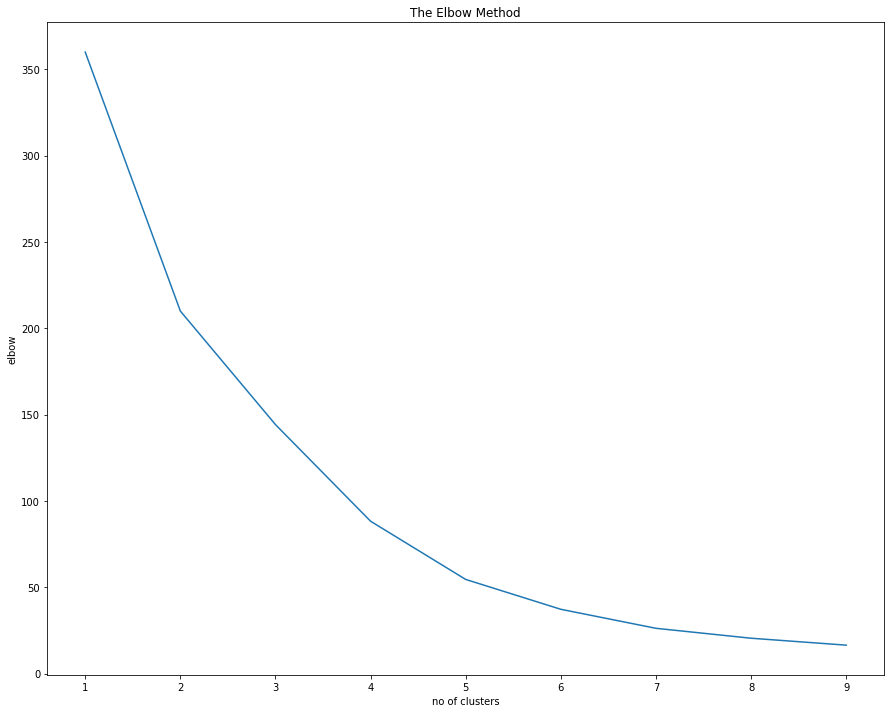

In [54]:
fig = plt.figure(figsize=(15, 12))
plt.plot(range(1,10), elbow)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('elbow')
plt.show()

In [32]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scaled_data_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 3, 3, 4, 4, 3, 3, 3], dtype=int32)

In [33]:
# add clustering labels
merged_seattle_df['Cluster_Labels'] = kmeans.labels_

In [34]:
merged_seattle2_df = merged_seattle_df[['zipcode','Asian Restaurant','Japanese Restaurant','mean_sqft_lot','mean_bedrooms','mean_price','Cluster_Labels', 'mean_lat', 'mean_long']]
merged_seattle2_df.head()

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
0,98006,0.000000,0.000000,13383.435743,3.841365,8.596848e+05,0,47.558022,-122.146839
1,98033,0.000000,0.000000,10493.812500,3.560185,8.037195e+05,0,47.680088,-122.187660
2,98040,0.019608,0.019608,13704.464539,4.028369,1.194230e+06,1,47.559846,-122.225592
3,98042,0.000000,0.000000,18954.771898,3.397810,3.116321e+05,3,47.365665,-122.115453
4,98056,0.000000,0.000000,9566.492611,3.435961,4.208905e+05,3,47.509657,-122.182778


In [35]:
# create map
map_clusters = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_seattle2_df['mean_lat'], merged_seattle2_df['mean_long'], merged_seattle2_df['zipcode'], merged_seattle2_df['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [36]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 1]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
2,98040,0.019608,0.019608,13704.464539,4.028369,1.194230e+06,1,47.559846,-122.225592


In [37]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 2]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
15,98010,0.0,0.0,55465.300000,3.290000,423665.990000,2,47.333210,-121.999470
17,98014,0.0,0.0,96902.862903,3.000000,455617.112903,2,47.671488,-121.848532
19,98022,0.0,0.0,74102.047009,3.149573,315709.303419,2,47.211450,-121.995167
21,98024,0.0,0.0,101724.814815,3.296296,580526.790123,2,47.558419,-121.905259
31,98045,0.0,0.0,50078.054299,3.230769,439471.081448,2,47.473359,-121.759036
38,98070,0.0,0.0,97262.957627,2.754237,487479.627119,2,47.417423,-122.463822
42,98077,0.0,0.0,54829.000000,3.616162,682774.878788,2,47.745922,-122.061202


In [38]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 3]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
3,98042,0.0,0.0,18954.771898,3.397810,311632.105839,3,47.365665,-122.115453
4,98056,0.0,0.0,9566.492611,3.435961,420890.549261,3,47.509657,-122.182778
7,98108,0.0,0.0,5204.844086,3.204301,355678.516129,3,47.549769,-122.306871
8,98001,0.0,0.0,14937.450276,3.383978,280804.690608,3,47.309020,-122.270646
9,98002,0.0,0.0,7517.633166,3.326633,234284.035176,3,47.308780,-122.213357
10,98003,0.0,0.0,10603.096429,3.357143,294111.278571,3,47.315741,-122.310054
16,98011,0.0,0.0,11314.138462,3.548718,490351.466667,3,47.755192,-122.201174
18,98019,0.0,0.0,39838.384211,3.363158,424788.747368,3,47.737096,-121.954832
20,98023,0.0,0.0,10470.208417,3.424850,286732.791583,3,47.308622,-122.364283
23,98028,0.0,0.0,11935.374558,3.480565,462480.035336,3,47.755138,-122.246028


In [39]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 4]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
5,98057,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0
6,98101,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0


In [40]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 5]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
30,98039,0.0,0.0,17403.56,4.06,2160606.6,5,47.62584,-122.23354


In [41]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 6]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long


In [42]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 7]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long


In [43]:
merged_seattle2_df.loc[merged_seattle2_df['Cluster_Labels'] == 0]

,zipcode,Asian Restaurant,Japanese Restaurant,mean_sqft_lot,mean_bedrooms,mean_price,Cluster_Labels,mean_lat,mean_long
0,98006,0.0,0.0,13383.435743,3.841365,8.596848e+05,0,47.558022,-122.146839
1,98033,0.0,0.0,10493.812500,3.560185,8.037195e+05,0,47.680088,-122.187660
11,98004,0.0,0.0,13104.220820,3.854890,1.355927e+06,0,47.616183,-122.205189
12,98005,0.0,0.0,19928.785714,3.851190,8.101649e+05,0,47.611532,-122.167268
13,98007,0.0,0.0,10662.702128,3.815603,6.171051e+05,0,47.610522,-122.142078
14,98008,0.0,0.0,10188.448763,3.734982,6.455074e+05,0,47.613312,-122.115834
22,98027,0.0,0.0,32856.990291,3.536408,6.169906e+05,0,47.521687,-122.042847
24,98029,0.0,0.0,8679.679128,3.426791,6.126536e+05,0,47.559557,-122.005657
32,98052,0.0,0.0,11122.012195,3.616725,6.452315e+05,0,47.680538,-122.119277
33,98053,0.0,0.0,35547.348148,3.212346,6.781631e+05,0,47.679901,-122.022817


In [44]:
from collections import Counter

In [45]:
Counter(kmeans.labels_)

Counter({0: 19, 1: 1, 2: 7, 3: 42, 4: 2, 5: 1})